# 

In [1]:
# Copyright (c) 2025 Devansh R Agrawal - All rights reserved.

In [2]:
ENV["JULIA_PKG_PRECOMPILE_AUTO"]=0

0

In [3]:
] activate .

  Activating project at `~/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples`


In [4]:
] st

Status `~/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/Project.toml`
  [c4b27c1d] Dubins v1.2.0
⌅ [f6369f11] ForwardDiff v0.10.38
  [c276d96c] GatekeeperFormationFlight v1.0.0-DEV `..`
  [ab2f91bb] OSQP v0.8.1
  [1dea7af3] OrdinaryDiffEq v6.93.0
  [91a5bcdd] Plots v1.40.13
  [90137ffa] StaticArrays v1.9.13
  [37e2e46d] LinearAlgebra v1.11.0
  [9a3f8284] Random v1.11.0
  [2f01184e] SparseArrays v1.11.0
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [5]:
using GatekeeperFormationFlight
using Plots, LinearAlgebra, StaticArrays, Random
using Dubins

GFF = GatekeeperFormationFlight


[ Info: Precompiling GatekeeperFormationFlight [c276d96c-8ff3-430d-986d-db5867057ed6] (cache misses: include_dependency fsize change (6), mismatched flags (12))


GatekeeperFormationFlight

In [6]:
# wez = Cbez(; x=0.5, y=0.5, ψ = 2π * rand(), R=0.15, t=0.15, v=1.0)
# wez = Cbez(; x=0.5, y=0.5, ψ = 2π * rand(), R = rand(), t=rand(), v=rand(), μ=rand())
# wez2 = Cardioid(0.5, 0.5)

wez = Cbez(rand(), rand(), 2π*rand())

Cbez{Float64}(0.34303994261429616, 0.20484914184071035, 4.372164583155657, 0.9, 0.25, 1.0, 0.1, 0.1)

In [7]:
robot = Robot(0.0,0.0,π/4)

Robot{Float64}(0.0, 0.0, 0.7853981633974483)

┌ Plots | Warning ] : Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, gui

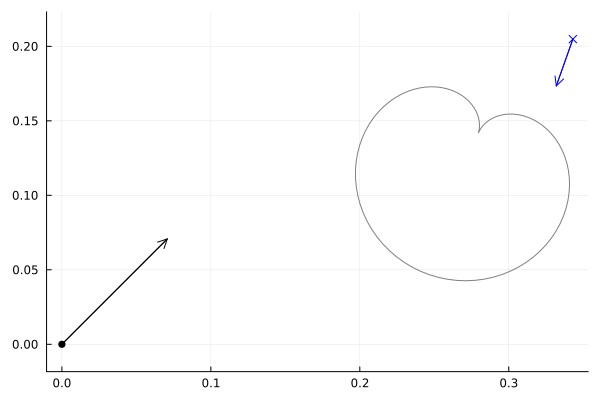

In [8]:
plot()
plot!(robot)
plot!(wez, robot)
# plot!(wez2, robot)

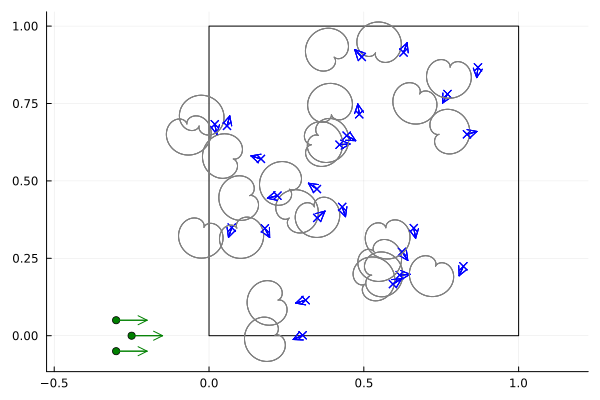

In [9]:

# create an environment
function create_random_scenario(N_wezes = 24)
    wezes_1 = [Cbez(
            rand(), 
            rand(),
            2π*rand(),
        ) for i = 1:N_wezes/2]

    wezes_2 = [Cbez(
            0.5 + 0.2 * randn(),
            0.5 + 0.2 * randn(),
            2π*rand(),
        ) for i = 1:N_wezes/2]
    
    # wezes_2 = [Cbez(0.5 + 0.2 * randn(), 0.5 + 0.2 * randn(), 2π*rand(), R= 0.05, t=0.05) for i = 1:N_wezes/2]
    wezes = vcat(wezes_1, wezes_2)
    return wezes
end

# change the seed to get different environments
# seed = 27182818 with 24 wezes is a good looking env.
# seed = 1, N = 24 is good
# seed = 2, N = 24 is good
# seed = 2718, N = 24 is good
# seed = 271828, N = 24 is good
Random.seed!(1)
wezes = create_random_scenario(24)

# create a set of robots
leader_robot = Robot(-0.25, 0.0, 0.0)
follower_robots = [Robot(-0.3, -0.05, 0.0), Robot(-0.3, 0.05, 0.0)]
robots = vcat(leader_robot, follower_robots...)

plotscenario(wezes, robots)

In [10]:

# plan a path for the leader using RRT*
domain = ((@SVector [0, 0, -1.0 * π]), (@SVector [1, 1, 1.0 * π]))
turning_radius = 0.1
rrt_problem = DubinsRRTProblem(domain, turning_radius, wezes)


DubinsRRTProblem{Float64, Cbez{Float64}}(([0.0, 0.0, -3.141592653589793], [1.0, 1.0, 3.141592653589793]), 0.1, Cbez{Float64}[Cbez{Float64}(0.07336635446929285, 0.34924148955718615, 4.390857551235271, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6282647403425017, 0.9149290036628314, 1.2114491231010585, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.7701803478856664, 0.7805192636751863, 4.211392655002153, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.16771210647092682, 0.5710874493423871, 2.8450802625834792, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.30232547191787174, 0.0013502779247226426, 3.5627148125272763, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6159379234562881, 0.19573857852575793, 0.07830071569449379, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.3119923865097316, 0.11479916823306191, 3.430925227253167, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6232150941621899, 0.2708693898950604, 5.310435222511279, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.49359045543272007, 0.9003405842788204, 2.3383

In [11]:
# start the tree with the root node
nodes = [Node(SVector(0, 0, 0.0))]

# add 1000 nodes to the tree
nodes = rrt_star(rrt_problem, nodes, 2000)

# see if there is a path 
success_code, waypoints = get_best_path(rrt_problem, nodes, @SVector [1.0, 1.0, 0])

(true, SVector{3, Float64}[[0.0, 0.0, 0.0], [0.309610340915048, 0.21634571091317398, 0.3018295833045713], [0.4486452797541325, 0.2809777886106172, 0.41939526948999173], [0.6720442395641852, 0.6295473432426884, 1.3773435598034227], [0.6739570498585122, 0.6936947317224628, 1.7142976858662198], [0.7628169845904933, 0.8563114058712424, 1.0994431189623715], [1.0, 1.0, 0.0]])

In [12]:
@assert success_code

# prepend and append the start and the goal
waypoints = [SVector(leader_robot), waypoints..., SVector(1.25, 1, 0.0)]

path = DubinsPath[]
# add all the waypoints to the path
for i = 2:length(waypoints)
    e, p = dubins_shortest_path(waypoints[i-1], waypoints[i], rrt_problem.turning_radius)
    @assert e == Dubins.EDUBOK
    push!(path, p)
end

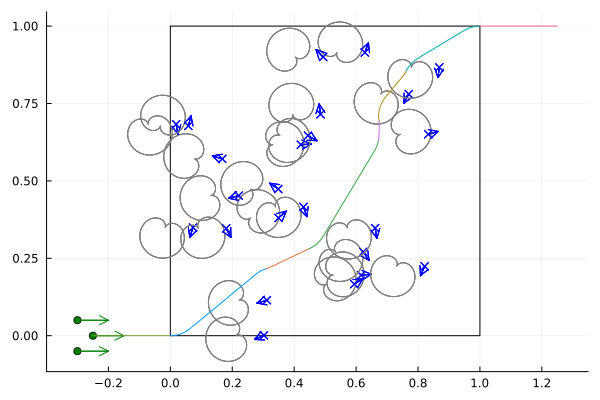

In [13]:
plotscenario(wezes, robots)
for p in path
    plot!(p)
end
plot!()

[ Plots | Info ] : Saved animation to /Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif


Plots.AnimatedGif("/Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif")
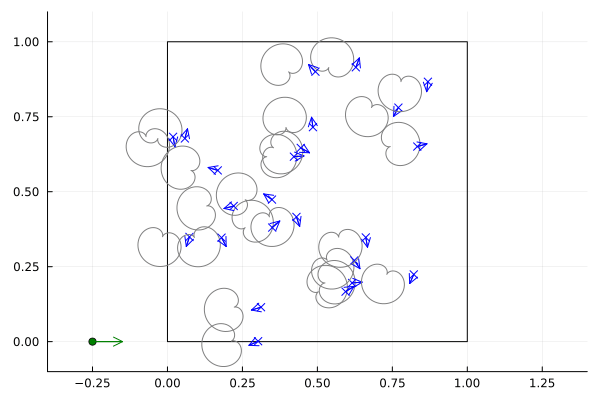

In [14]:
@gif for t in range(0, total_path_length(path), length=120)
    r = Robot(get_reference_state_and_input(path, t)[1])

    plotscenario(wezes, [r])
    xlims!(-0.4, 1.4)
    ylims!(-0.1, 1.1)
end

In [15]:
# solve for the trajectory using gatekeeper

In [16]:
# offsets = [SVector(robot) - SVector(leader_robot) for robot in robots]

# # For all three robots, we can define the set of problems as 
# gk_problems = [
#     GatekeeperProblem(;
#         wezes = wezes,
#         reference_path = path,
#         offset = offsets[i],
#         switch_step_size = 2e-3,
#         reconnection_step_size = 0.01,
#         max_Ts_horizon = 0.5,
#         integration_max_step_size = 1e-3,
#         collision_check_step_size = 1e-3,
#     ) for i = 1:length(robots)
# ]


In [17]:

# # We can now `solve` the problems and plot the solutions:
# tspan = [0.0, total_path_length(path)]
# gk_solutions = [
#     simulate_closed_loop_gatekeeper(SVector(robots[i]), tspan, gk_problems[i]) for
#     i = 1:length(robots)
# ]


In [18]:

# Tmax = total_path_length(path)

# # plot reference path
# plotscenario(wezes, robots)
# # plot offset path
# for i = 1:length(robots)
#     plot!(
#         τ -> get_reference_state_and_input(path, τ, offsets[i])[1][1],
#         τ -> get_reference_state_and_input(path, τ, offsets[i])[1][2],
#         0.0,
#         Tmax,
#         linestyle = :dash,
#         label = false,
#         linecolor = :black,
#     )
# end
# # plot the gk solution
# for i = 1:length(robots)
#     plot!(
#         t -> gk_solutions[i](t)[1],
#         t -> gk_solutions[i](t)[2],
#         0.0,
#         Tmax,
#         label = "gk_sol_$(i)",
#         color = (i == 1 ? :black : :green),
#         linewidth = 2,
#     )
# end

# plot!(aspect_ratio = :equal)


In [19]:
# # Finally, lets animate the solutions:
# anim = @animate for t in range(0, Tmax, length=120)

#     # grab the states
#     robots_ = [Robot(gk_solutions[i](t)) for i=1:length(gk_solutions)]

#     # start the plot
#     plot()

#     # plot the reference paths
#     for i=1:3
#         plot!(
#             τ -> get_reference_state_and_input(path, τ, offsets[i])[1][1],
#             τ -> get_reference_state_and_input(path, τ, offsets[i])[1][2],
#             0, Tmax;
#             label=false, color=:gray, linestyle=:dash)
#     end

#     # plot the trace of the robots upto this point of time
#     for i=1:3
#         plot!(τ -> gk_solutions[i](τ)[1], τ -> gk_solutions[i](τ)[2], 0.0, t, label="gk_sol_$(i)", color=(i==1 ? :black : :green), linewidth=2)
#     end

#     # plot the current state of affairs
#     plotscenario!(wezes, robots_)

#     plot!()
# end

# gif(anim, "gatekeeper.gif")

In [20]:
# now try running the CBF-QP

The QP

$$
\begin{align}
\operatorname{minimize } \ & \Vert u - u_d \Vert ^2\\
\text{such that } \ & Lfh_1(x) + Lgh_1(x) u \geq -\alpha h_1(x)\\
& Lfh_2(x) + Lgh_2(x) u \geq -\alpha h_2(x)\\
& \vdots\\
& Lfh_N(x) + Lgh_N(x) u \geq -\alpha h_N(x)\\
& u \in \mathcal{U}
\end{align}
$$


in standard form is

$$
\begin{align}
\operatorname{minimize } \ & \frac{1}{2} u^T u - u_d^T u\\
&  
\begin{bmatrix}
-L_fh_1(x) - \alpha h_1(x) \\
-L_fh_2(x) - \alpha h_2(x) \\
\vdots\\
-L_fh_N(x) - \alpha h_N(x) \\
\end{bmatrix}
\leq
\begin{bmatrix}
L_gh_1(x) \\
L_gh_2(x) \\
\vdots \\
L_ghN(x)
\end{bmatrix}
u \leq 
\begin{bmatrix}
\infty\\
\infty\\
\vdots\\
\infty
\end{bmatrix}\\
& u \in \mathcal{U}
\end{align}
$$



and if the first is infeasible, we solve the relaxed one instead: 

$$
\begin{align}
\operatorname{minimize } \ & \frac{1}{2} \begin{bmatrix}u\\s\end{bmatrix}^T \begin{bmatrix}\epsilon \\ & \epsilon \\ && 1 \end{bmatrix} \begin{bmatrix} u \\ s \end{bmatrix} - \begin{bmatrix} u_d \\ 0\end{bmatrix}^T  \begin{bmatrix}u \\ s \end{bmatrix}\\
&  
\begin{bmatrix}
-L_fh_1(x) - \alpha h_1(x) \\
-L_fh_2(x) - \alpha h_2(x) \\
\vdots\\
-L_fh_N(x) - \alpha h_N(x) \\
\hline
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
\leq
\begin{bmatrix}
L_gh_1(x) & 1 \\
L_gh_2(x) & & 1 \\
\vdots & & & \ddots \\
L_gh_N(x) & & &  & 1 \\
\hline
0 & 1\\
0 & & 1 \\ 
\vdots & & & \ddots \\
0 & & & & 1
\end{bmatrix}
\begin{bmatrix} u  \\ s \end{bmatrix} \leq 
\begin{bmatrix}
\infty\\
\infty\\
\vdots\\
\infty\\
\hline
\infty \\
\infty \\
\vdots \\
\infty
\end{bmatrix}\\
& u \in \mathcal{U}
\end{align}
$$

for $\epsilon = 10^{-5}$


In [60]:
module CBFQP

using ForwardDiff, LinearAlgebra, StaticArrays
using GatekeeperFormationFlight
using OSQP, SparseArrays
using OrdinaryDiffEq

GFF = GatekeeperFormationFlight

function h(wez::W, x) where {W <: GFF.AbstractWez}
    return collision_distance(wez, x)
end

function dhdx(wez::W, x) where {W <: GFF.AbstractWez}
    return ForwardDiff.gradient(xi -> h(wez, xi), x)
end

function f(x)
    return SVector(0,0,0.)
end

function g(x)
    θ = x[3]
    return @SMatrix [
        [cos(θ);; 0];
        [sin(θ);; 0];
        [0 ;; 1]
        ]
end

function Lfh(wez::W, x) where {W <: GFF.AbstractWez}
    return dhdx(wez, x)' * f(x)
end

function Lgh(wez::W, x) where {W <: GFF.AbstractWez}
    return dhdx(wez, x)' * g(x)
end

function create_CBF_constraints(x, u_d, wezes::VW, α=100.0) where {W <: GFF.AbstractWez, VW <: AbstractVector{W}}
    # create the main constraints
    A = vcat([Lgh(w, x) for w in wezes]...)
    l = [ -Lfh(w, x) - α * h(w, x) for w in wezes]
    u = [Inf for w in wezes]

    return A, l, u
end

function create_input_constraints(vlims, ωlims)
    A = I(2)
    l = [vlims[1], ωlims[1]]
    u = [vlims[2], ωlims[2]]

    return A, l, u
end

function create_relaxed_input_constraints(vlims, ωlims, N_Z)
    A_input, l, u = create_input_constraints(vlims, ωlims)

    A = hcat(A_input, zeros(2, N_Z))

    return A, l, u
end

function create_relaxed_CBF_constraints(x, u_d, wezes::VW, α=100.0) where {W <: GFF.AbstractWez, VW <: AbstractVector{W}}

    A, l, u = create_CBF_constraints(x, u_d, wezes, α)

    N_Z = length(wezes)
    
    A_relaxed = [[A;; I(N_Z)]; [zeros(N_Z, 2) ;; I(N_Z)]]
    l_relaxed = vcat(l, zeros(N_Z))
    u_relaxed = vcat(u, Inf * ones(N_Z))

    return A_relaxed, l_relaxed, u_relaxed
    
end


function cbf_qp(x, u_d, wezes::VW; α=100.0, vlims=(0.8, 1.0), ωlims=(-10.0, 10.0)) where {W <: GFF.AbstractWez, VW <: AbstractVector{W}}

    P = diagm([2500.0, 1.0]) # to prioritize the ω control
    q = - u_d

    # create cbf constraints
    A_cbf, l_cbf, u_cbf = create_CBF_constraints(x, u_d, wezes, α)

    # create input constraints
    A_input, l_input, u_input = create_input_constraints(vlims, ωlims)

    # create all constraints
    A = vcat(A_cbf, A_input)
    l = vcat(l_cbf, l_input)
    u = vcat(u_cbf, u_input)

    m = OSQP.Model()
    OSQP.setup!(m; P=sparse(P), q=q, A=sparse(A), l=l, u=u, verbose=false)
    results = OSQP.solve!(m)

    return results

end

function cbf_qp_relaxed(x, u_d, wezes::VW; α=100.0, vlims=(0.8, 1.0), ωlims=(-10.0, 10.0), ϵ=1e-7) where {W <: GFF.AbstractWez, VW <: AbstractVector{W}}

    N_Z = length(wezes)
    
    P = diagm([2500*ϵ, ϵ, ones(N_Z)...])
    q = vcat(-u_d,  zeros(N_Z))

    # create the main constraints
    A_cbf, l_cbf, u_cbf = create_relaxed_CBF_constraints(x, u_d, wezes, α)

    # create input constraints
    A_input, l_input, u_input = create_relaxed_input_constraints(vlims, ωlims, N_Z)

    # create all constraints
    A = vcat(A_cbf, A_input)
    l = vcat(l_cbf, l_input)
    u = vcat(u_cbf, u_input)

    # return A, l, u
    
    m = OSQP.Model()
    OSQP.setup!(m; P=sparse(P), q=q, A=sparse(A), l=l, u=u, verbose=false)
    results = OSQP.solve!(m)

    return results

end

function cbf_qp_controller(x, u_d, wezes::VW; α=100.0, vlims=(0.8, 1.0), ωlims=(-10.0, 10.0), ϵ=1e-5) where {W <: GFF.AbstractWez, VW <: AbstractVector{W}}

    res = cbf_qp(x, u_d, wezes; α=α, vlims=vlims, ωlims=ωlims)

    if res.info.status == :Solved
        return SVector(res.x[1], res.x[2])
    end

    # ok so something went wrong, solve the relaxed version
    res_relaxed = cbf_qp_relaxed(x, u_d, wezes; α=α, vlims=vlims, ωlims=ωlims, ϵ=ϵ)

    return SVector(res_relaxed.x[1], res_relaxed.x[2])
end




"""
    CBFProblem(kwargs...)

construct a `CBFProblem`. The arguments are:
- wezes,                              # list of wezes
- reference_path,                     # path of the leader
- offset = SVector(0.0, 0.0, 0.0),    # desired offset from the leaders path
- turning_radius = 0.1,               # max turning radius of a robot
- max_Ts_horizon = 1.0,               # maximum switching time
- integration_max_step_size = 0.05,   # max integration step size in nominal tracking
- switch_step_size = 0.05             # resolution used to decrease switch time
- α = 100.0                           # α used in the CBF-QP
"""
@kwdef struct CBFProblem{TW,TR,TO,TF}
    wezes::TW                            # list of wezes
    reference_path::TR                   # path of the leader
    offset::TO = SVector(0.0, 0.0, 0.0)  # desired offset from the leaders path
    turning_radius::TF = 0.1             # max turning radius of a robot
    integration_max_step_size::TF = 0.0001   # max integration step size in nominal tracking
    α::TF = 100.0                        # α used in the CBF-QP
end


Base.show(io::IO, prob::CBFProblem) = print(
    io,
    "CBF Problem(|wezes|: ",
    length(prob.wezes),
    ", offset: ",
    prob.offset,
    ", turning radius: ",
    prob.turning_radius,
    ")",
)
Base.show(io::IO, ::MIME"text/plain", prob::CBFProblem) = print(
    io,
    "CBF Problem\n",
    " - Number of wezes: ",
    length(prob.wezes),
    "\n - offset: ",
    prob.offset,
    "\n - turning radius: ",
    prob.turning_radius,
)


"""
    closed_loop_CBF!(D, state, prob::CBFProblem, time)

defines the closed_loop dynamics for a CBF-QP
"""
function closed_loop_CBF!(D, state, prob, time)

    # determine a desired state for this robot
    state_desired, input_desired = get_reference_state_and_input(prob.reference_path, time, prob.offset)
    
    # run a tracking controller for this robot
    v, ω = tracking_controller(state, state_desired, input_desired)

    # run the cbf-qp
    v, ω = cbf_qp_controller(SVector{3}(state), [v, ω], prob.wezes; α=prob.α, vlims=(0.8, 1.0), ωlims=(-10.0, 10.0), ϵ=1e-5)

    # apply input bounds
    v, ω = apply_input_bounds(v, ω)

    # follower dynamics
    D[1] = v * cos(state[3])
    D[2] = v * sin(state[3])
    D[3] = ω
end


"""
    simulate_closed_loop_cbf(initial_state, tspan, prob::CBFProblem)
    
returns the closed-loop trajectory from running a CBF-QP controller.
"""
function simulate_closed_loop_cbf(initial_state, tspan, prob::CBFProblem)

    # setup the odeproblem
    odeproblem = ODEProblem(closed_loop_CBF!, Vector(initial_state), tspan, prob)

    # # update_committed_callback = PeriodicCallback(update_committed_affect!, prob.switch_step_size)
    # update_committed_callback =
    #     IterativeCallback(time_choice_gatekeeper, update_committed_affect!)

    odesol = solve(
        odeproblem,
        Tsit5();
        dtmax = prob.integration_max_step_size, 
        dt = prob.integration_max_step_size, 
        # callback = update_committed_callback,
    )

    return odesol

end




end

Main.CBFQP

In [61]:
@time res = CBFQP.cbf_qp_controller(SVector(leader_robot), [1.0, 0.], wezes; α=100.0)

  0.244338 seconds (477.22 k allocations: 23.432 MiB, 99.89% compilation time)


2-element SVector{2, Float64} with indices SOneTo(2):
  0.7997840694203086
 -0.0012636770565819981

In [62]:
offsets = [SVector(robot) - SVector(leader_robot) for robot in robots]

3-element Vector{SVector{3, Float64}}:
 [0.0, 0.0, 0.0]
 [-0.04999999999999999, -0.05, 0.0]
 [-0.04999999999999999, 0.05, 0.0]

In [63]:
cbf_probs = [CBFQP.CBFProblem(; 
    wezes = wezes, 
    reference_path = path,
    offset = offsets[i],
    α = 100.0
    )
    for i=1:length(robots)
]

3-element Vector{Main.CBFQP.CBFProblem{Vector{Cbez{Float64}}, Vector{DubinsPath}, SVector{3, Float64}, Float64}}:
 CBF Problem(|wezes|: 24, offset: [0.0, 0.0, 0.0], turning radius: 0.1)
 CBF Problem(|wezes|: 24, offset: [-0.04999999999999999, -0.05, 0.0], turning radius: 0.1)
 CBF Problem(|wezes|: 24, offset: [-0.04999999999999999, 0.05, 0.0], turning radius: 0.1)

In [64]:
tspan = (0, total_path_length(path))
cbf_sols = [
    CBFQP.simulate_closed_loop_cbf(SVector(robots[i]), tspan, cbf_probs[i])
    for i=1:length(robots)
    ]

3-element Vector{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Main.CBFQP.CBFProblem{Vector{Cbez{Float64}}, Vector{DubinsPath}, SVector{3, Float64}, Float64}, SciMLBase.ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Main.CBFQP.CBFProblem{Vector{Cbez{Float64}}, Vector{DubinsPath}, SVector{3, Float64}, Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Main.CBFQP.CBFProblem{Vector{Cbez{Float64}}, Vector{DubinsPath}, SVector{3, Float64}, Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing,

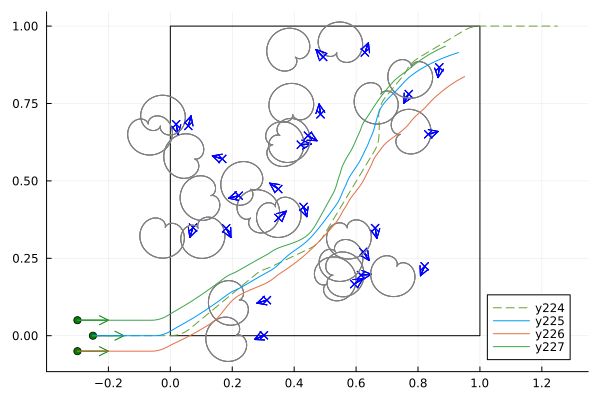

In [65]:
plotscenario(wezes, robots)
plot!(t->get_reference_state(path, t)[1], t->get_reference_state(path, t)[2], tspan..., linestyle=:dash) 
for i=1:length(robots)
    plot!(t -> cbf_sols[i](t)[1], t -> cbf_sols[i](t)[2], tspan...)
end
plot!()

[ Plots | Info ] : Saved animation to /Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif


Plots.AnimatedGif("/Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif")
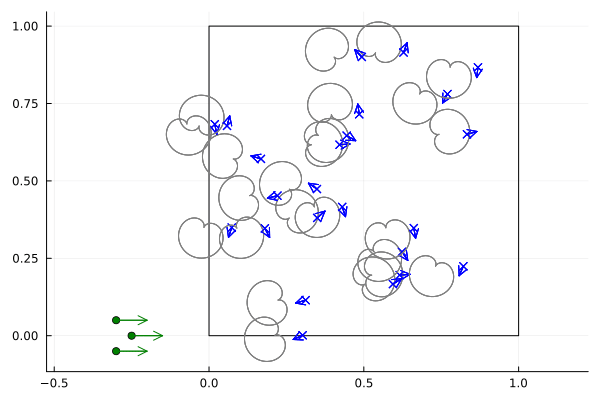

In [66]:
@gif for t in range(tspan..., length=120)
    robots_ = [Robot(cbf_sols[i](t)...) for i=1:length(robots)]

    plotscenario(wezes, robots_)
end

In [67]:
9

9

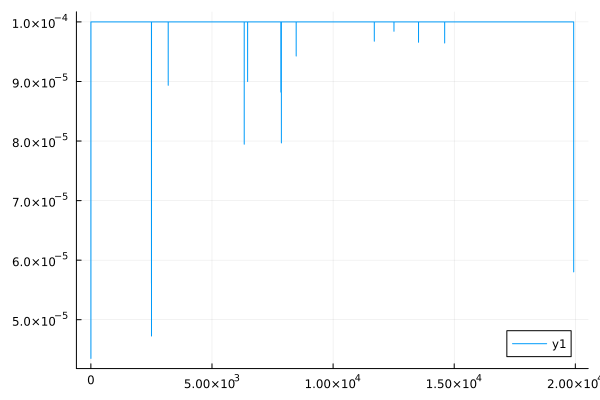

In [68]:
plot(diff(cbf_sols[1].t))